In [129]:
import numpy as np
from PIL import Image
import glob

filelist_black = glob.glob('./color/black/*.jpg')
filelist_red = glob.glob('./color/red/*.jpg')

black = 0
red = 1

input_black = np.array([np.array(Image.open(fname)) for fname in filelist_black])
label_black = np.full((100,1), black)


input_red = np.array([np.array(Image.open(fname)) for fname in filelist_red])
label_red = np.full((100,1), red)

data = np.concatenate((input_black, input_red))
labels = np.concatenate((label_black, label_red))

In [130]:
print(data.shape)
print(labels.shape)

(200, 200, 200, 3)
(200, 1)


In [131]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
import time

start = time.time()

# Generate dummy data
x_train = data #np.random.random((200, 200, 200, 3))
y_train = keras.utils.to_categorical(labels, num_classes=2) #keras.utils.to_categorical(np.random.randint(10, size=(200, 1)), num_classes=10)
# x_test = np.random.random((20, 200, 200, 3))
# y_test = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes=10)

model = Sequential()
# input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=10)

end = time.time()
print(end - start)

# score = model.evaluate(x_test, y_test, batch_size=32)
# print(score)

Epoch 1/10
200/200 [==============================] - 22s 108ms/step - loss: 8.0169 - acc: 0.4950
Epoch 2/10
200/200 [==============================] - 19s 97ms/step - loss: 8.0590 - acc: 0.5000
Epoch 3/10
200/200 [==============================] - 19s 97ms/step - loss: 8.0590 - acc: 0.5000
Epoch 4/10
200/200 [==============================] - 20s 99ms/step - loss: 8.0590 - acc: 0.5000
Epoch 5/10
200/200 [==============================] - 20s 102ms/step - loss: 8.0590 - acc: 0.5000
Epoch 6/10
200/200 [==============================] - 20s 99ms/step - loss: 8.0590 - acc: 0.5000
Epoch 7/10
200/200 [==============================] - 20s 101ms/step - loss: 8.0590 - acc: 0.5000
Epoch 8/10
200/200 [==============================] - 19s 97ms/step - loss: 8.0590 - acc: 0.5000
Epoch 9/10
200/200 [==============================] - 19s 97ms/step - loss: 8.0590 - acc: 0.5000
Epoch 10/10
200/200 [==============================] - 20s 98ms/step - loss: 8.0590 - acc: 0.5000
199.483849049


In [132]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [133]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from matplotlib import pyplot
import time

start = time.time()

# Generate dummy data
a = data #np.random.random((200, 200, 200, 3))
b = keras.utils.to_categorical(labels, num_classes=2) #keras.utils.to_categorical(np.random.randint(10, size=(200, 1)), num_classes=10)
# x_test = np.random.random((20, 200, 200, 3))
# y_test = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes=10)

x_train, y_train = a, b#unison_shuffled_copies(a, b)

model = Sequential()
# input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=32, epochs=100)

end = time.time()
print(end - start)

# score = model.evaluate(x_test, y_test, batch_size=32)
# print(score)

Epoch 1/100
200/200 [==============================] - 22s 108ms/step - loss: 7.8538 - acc: 0.5050
Epoch 2/100
200/200 [==============================] - 20s 99ms/step - loss: 6.9308 - acc: 0.5700
Epoch 3/100
200/200 [==============================] - 20s 99ms/step - loss: 7.0114 - acc: 0.5650
Epoch 4/100
200/200 [==============================] - 20s 99ms/step - loss: 7.4143 - acc: 0.5400
Epoch 5/100
200/200 [==============================] - 20s 100ms/step - loss: 7.0920 - acc: 0.5600
Epoch 6/100
200/200 [==============================] - 20s 100ms/step - loss: 7.3337 - acc: 0.5450
Epoch 7/100
200/200 [==============================] - 20s 99ms/step - loss: 8.5426 - acc: 0.4700
Epoch 8/100
200/200 [==============================] - 20s 99ms/step - loss: 7.4143 - acc: 0.5400
Epoch 9/100
200/200 [==============================] - 20s 100ms/step - loss: 6.7696 - acc: 0.5800
Epoch 10/100
200/200 [==============================] - 20s 99ms/step - loss: 8.0590 - acc: 0.5000
Epoch 11/100
20

200/200 [==============================] - 20s 99ms/step - loss: 7.6561 - acc: 0.5250
Epoch 84/100
200/200 [==============================] - 20s 99ms/step - loss: 8.1396 - acc: 0.4950
Epoch 85/100
200/200 [==============================] - 20s 100ms/step - loss: 7.1726 - acc: 0.5550
Epoch 86/100
200/200 [==============================] - 20s 99ms/step - loss: 7.9785 - acc: 0.5050
Epoch 87/100
200/200 [==============================] - 20s 99ms/step - loss: 7.7367 - acc: 0.5200
Epoch 88/100
200/200 [==============================] - 20s 102ms/step - loss: 7.3337 - acc: 0.5450
Epoch 89/100
200/200 [==============================] - 20s 98ms/step - loss: 7.1726 - acc: 0.5550
Epoch 90/100
200/200 [==============================] - 20s 98ms/step - loss: 6.7696 - acc: 0.5800
Epoch 91/100
200/200 [==============================] - 20s 98ms/step - loss: 7.7367 - acc: 0.5200
Epoch 92/100
200/200 [==============================] - 20s 100ms/step - loss: 7.7367 - acc: 0.5200
Epoch 93/100
200/200

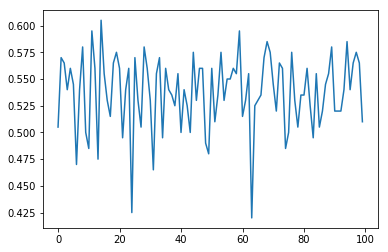

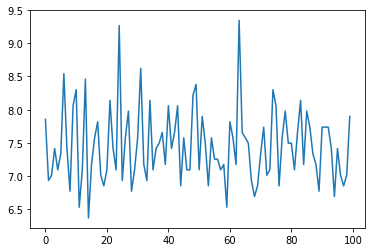

In [134]:
# pyplot.plot(history.history['mean_squared_error'])
# pyplot.plot(history.history['mean_absolute_error'])
# pyplot.plot(history.history['mean_absolute_percentage_error'])
# pyplot.plot(history.history['cosine_proximity'])
pyplot.plot(history.history['acc'])
pyplot.show()
pyplot.plot(history.history['loss'])
pyplot.show()

In [135]:
indexes = [1,5,100,150,164,199,175]

for i in indexes:
    img = Image.fromarray(data[i], 'RGB')
#     img.save('deleteme.png')
    img.show()
    print(labels[i])

[0]
[0]
[1]
[1]
[1]
[1]
[1]
